# 导入工具包

In [1]:
import networkx as nx
import numpy as np
# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题

In [2]:
import gzip
import re

import warnings
warnings.simplefilter('ignore')  # 忽略警告信息

# 构建图

In [3]:
fh = gzip.open("knuth_miles.txt.gz", "r")

G = nx.Graph()
G.position = {}
G.population = {}

cities = []
for line in fh.readlines(): # 遍历文件中的每一行
    line = line.decode()
    if line.startswith("*"):  # 其它行，跳过
        continue
    numfind = re.compile(r"^\d+")
    if numfind.match(line):  # 记录城市间距离的行
        dist = line.split()
        for d in dist:
            G.add_edge(city, cities[i], weight=int(d))
            i = i + 1
    else:  # 记录城市经纬度、人口的行
        i = 1
        (city, coordpop) = line.split("[")
        cities.insert(0, city)
        (coord, pop) = coordpop.split("]")
        (y, x) = coord.split(",")

        G.add_node(city)
        # assign position - Convert string to lat/long
        x = -float(x) / 100
        y = float(y) / 100
        G.position[city] = (x, y)
        pop = float(pop) / 1000
        G.population[city] = pop

# 查看图

In [4]:
print(G)
G.nodes
G.position #128城市经纬度坐标
G.population #128城市人口数据
G.edges #128城市互联互通关系


Graph with 128 nodes and 8128 edges


EdgeView([('Youngstown, OH', 'Yankton, SD'), ('Youngstown, OH', 'Yakima, WA'), ('Youngstown, OH', 'Worcester, MA'), ('Youngstown, OH', 'Wisconsin Dells, WI'), ('Youngstown, OH', 'Winston-Salem, NC'), ('Youngstown, OH', 'Winnipeg, MB'), ('Youngstown, OH', 'Winchester, VA'), ('Youngstown, OH', 'Wilmington, NC'), ('Youngstown, OH', 'Wilmington, DE'), ('Youngstown, OH', 'Williston, ND'), ('Youngstown, OH', 'Williamsport, PA'), ('Youngstown, OH', 'Williamson, WV'), ('Youngstown, OH', 'Wichita Falls, TX'), ('Youngstown, OH', 'Wichita, KS'), ('Youngstown, OH', 'Wheeling, WV'), ('Youngstown, OH', 'West Palm Beach, FL'), ('Youngstown, OH', 'Wenatchee, WA'), ('Youngstown, OH', 'Weed, CA'), ('Youngstown, OH', 'Waycross, GA'), ('Youngstown, OH', 'Wausau, WI'), ('Youngstown, OH', 'Waukegan, IL'), ('Youngstown, OH', 'Watertown, SD'), ('Youngstown, OH', 'Watertown, NY'), ('Youngstown, OH', 'Waterloo, IA'), ('Youngstown, OH', 'Waterbury, CT'), ('Youngstown, OH', 'Washington, DC'), ('Youngstown, OH', '

In [5]:
# 可以查看任意两座城市之间的距离，以纽约到里士满的交通距离为例
G.edges[('Rochester, NY', 'Richmond, VA')]

{'weight': 486}

In [6]:
# 筛选出距离小于指定阈值的城市：即包含所有节点的G的子图
H = nx.Graph()
for v in G:
    H.add_node(v)
for (u, v, d) in G.edges(data=True):
    if d["weight"] < 800:
        H.add_edge(u, v)


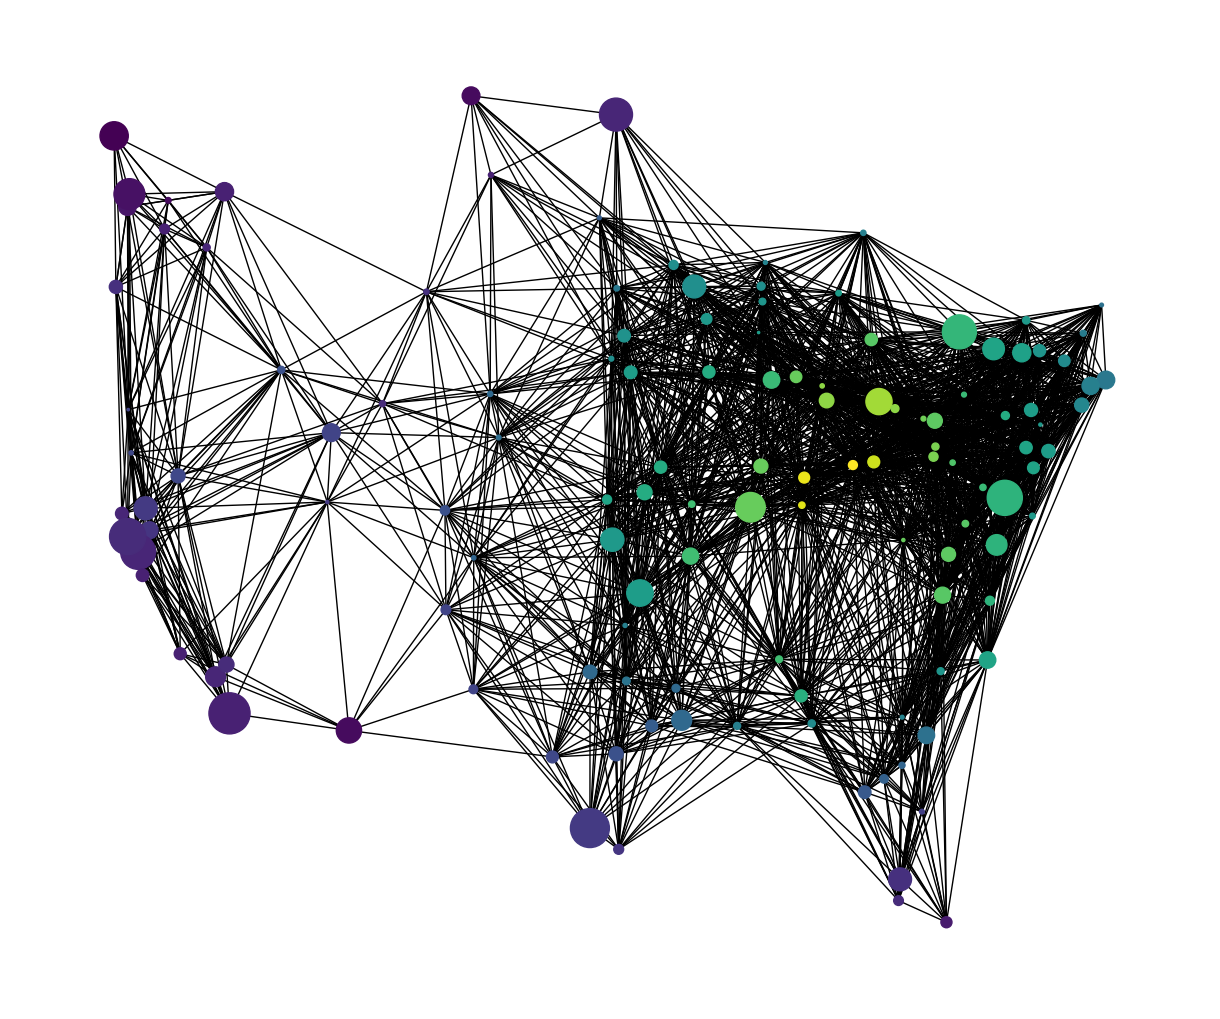

In [9]:
# 可视化：节点颜色根据节点的度来确定，节点的大小根据节点的人口来确定
# 节点颜色-节点度
node_color = [float(H.degree(v)) for v in H]

# 节点尺寸-节点人口
node_size = [G.population[v] for v in H]

fig = plt.figure(figsize=(12, 10))
nx.draw(
    H,
    G.position,#每个节点的经纬度
    node_size=node_size,
    node_color=node_color,
    with_labels=False,
)
plt.show()
